##Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.stats as scs


##Algumas manipulações

In [ ]:
data = pd.read_csv('/content/marketing_campaign.csv',sep = '\t')
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
#substituindo a coluna Year_Birth pela idade até 2021
Year_Birth = data['Year_Birth']
anos = (2015- Year_Birth).round()
anos = anos.astype('int64')
data['Year_Birth'] = anos
data.rename(columns={'Year_Birth': 'Age'},inplace= True)
data.head(10)

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,58,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,61,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,50,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,31,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,34,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,48,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,44,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,30,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,41,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,65,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
def exclui_outliers(data, col_name):
  intervalo = 2*data[col_name].std()
  media = data[col_name].mean()
  data.loc[data[col_name] < (media - intervalo), col_name] = np.nan
  data.loc[data[col_name] > (media + intervalo), col_name] = np.nan

numerical_cols = ['Age','Recency','MntWines','MntFruits','MntMeatProducts',
                  'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases',
                  'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
for col in numerical_cols:
  exclui_outliers(data, col)

In [ ]:
data['Response'].replace(1,'yes',inplace=True)
data['Response'].replace(0,'no',inplace=True)

In [ ]:
data.isna().sum()

ID                       0
Age                     34
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines               128
MntFruits              155
MntMeatProducts        135
MntFishProducts        163
MntSweetProducts       150
MntGoldProds           146
NumDealsPurchases       86
NumWebPurchases         91
NumCatalogPurchases    113
NumStorePurchases       83
NumWebVisitsMonth       20
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
dtype: int64

In [ ]:
#tratando valores faltantes
data['Income'].fillna(data['Income'].median(),inplace = True)
data['Age'].fillna(data['Age'].median(),inplace = True)
data['MntWines'].fillna(data['MntWines'].median(),inplace = True)
data['MntFruits'].fillna(data['MntFruits'].median(),inplace = True)
data['MntMeatProducts'].fillna(data['MntMeatProducts'].median(),inplace = True)
data['MntFishProducts'].fillna(data['MntFishProducts'].median(),inplace = True)
data['MntSweetProducts'].fillna(data['MntSweetProducts'].median(),inplace = True)
data['MntGoldProds'].fillna(data['MntGoldProds'].median(),inplace = True)
data['NumDealsPurchases'].fillna(data['NumDealsPurchases'].median(),inplace = True)
data['NumWebVisitsMonth'].fillna(data['NumWebVisitsMonth'].median(),inplace = True)
data['NumWebPurchases'].fillna(data['NumWebPurchases'].median(),inplace = True)
data['NumCatalogPurchases'].fillna(data['NumCatalogPurchases'].median(),inplace = True)
data['NumStorePurchases'].fillna(data['NumStorePurchases'].median(),inplace = True)

In [ ]:
data = data.drop(['Dt_Customer'],axis=1)
data = data.drop(['Z_CostContact'],axis=1)
data = data.drop(['Z_Revenue'],axis=1)
data = data.drop(['ID'],axis = 1)

In [ ]:
data.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,58.0,Graduation,Single,58138.0,0,0,58.0,635.0,88.0,546.0,10.0,88.0,88.0,3.0,8.0,1.0,4.0,7.0,0,0,0,0,0,0,yes
1,61.0,Graduation,Single,46344.0,1,1,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0,no
2,50.0,Graduation,Together,71613.0,0,0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0,no
3,31.0,Graduation,Together,26646.0,1,0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0,no
4,34.0,PhD,Married,58293.0,1,0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0,no


In [ ]:
data = pd.get_dummies(data)

In [ ]:
data

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response_no,Response_yes
0,58.0,58138.0,0,0,58.0,635.0,88.0,546.0,10.0,88.0,88.0,3.0,8.0,1.0,4.0,7.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,61.0,46344.0,1,1,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,50.0,71613.0,0,0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,31.0,26646.0,1,0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,34.0,58293.0,1,0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,48.0,61223.0,0,1,46.0,709.0,43.0,182.0,42.0,7.0,21.0,2.0,9.0,3.0,4.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2236,69.0,64014.0,2,1,56.0,406.0,0.0,30.0,0.0,0.0,8.0,2.0,8.0,2.0,5.0,7.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2237,34.0,56981.0,0,0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,5.0,6.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2238,59.0,69245.0,0,1,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
X = data.drop(['Response_yes'], axis=1)
y = data.Response_yes

In [ ]:
X = X.drop(['Response_no'],axis=1)

In [ ]:
X

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58.0,58138.0,0,0,58.0,635.0,88.0,546.0,10.0,88.0,88.0,3.0,8.0,1.0,4.0,7.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,61.0,46344.0,1,1,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,50.0,71613.0,0,0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,31.0,26646.0,1,0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,34.0,58293.0,1,0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,48.0,61223.0,0,1,46.0,709.0,43.0,182.0,42.0,7.0,21.0,2.0,9.0,3.0,4.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,69.0,64014.0,2,1,56.0,406.0,0.0,30.0,0.0,0.0,8.0,2.0,8.0,2.0,5.0,7.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,34.0,56981.0,0,0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,5.0,6.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,59.0,69245.0,0,1,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X = (X - X.min())/(X.max()-X.min())

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predic=clf.predict(X_test)


In [ ]:
print(round(accuracy_score(y_test,y_predic)*100),'%')

88 %


Text(0, 0.5, 'frequências relativas')

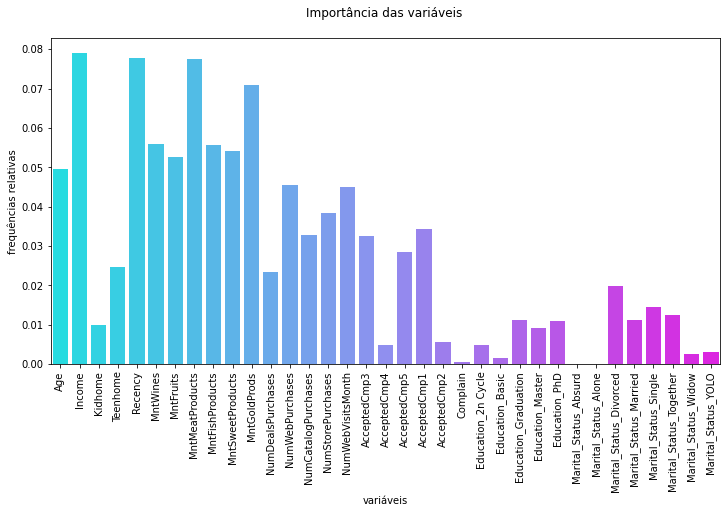

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=clf.feature_importances_,palette='cool')
plt.xticks(rotation=90)
plt.title('Importância das variáveis \n')
plt.xlabel('variáveis')
plt.ylabel('frequências relativas')